In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import os

In [4]:
os.chdir('D:\project')

In [5]:
df1 = pd.read_csv("train.csv")
df1.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [6]:
df2 = df1.drop(['PRT_ID','DATE_SALE','DATE_SALE','SALE_COND','BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'DATE_BUILD'],axis='columns')
df2.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,Yes,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,No,21717770
2,Adyar,909,70,1.0,1.0,3,Yes,13159200
3,Velachery,1855,14,3.0,2.0,5,No,9630290
4,Karapakkam,1226,84,1.0,1.0,3,Yes,7406250


In [7]:
df3 = df2.dropna()
df3['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [8]:
standardized_mapping = {
    'Karapakkam': 'Karapakkam',
    'Karapakam': 'Karapakkam',
    'Anna Nagar': 'Anna Nagar',
    'Ana Nagar': 'Anna Nagar',
    'Ann Nagar': 'Anna Nagar',
    'Adyar': 'Adyar',
    'Adyr': 'Adyar',
    'Velachery': 'Velachery',
    'Velchery': 'Velachery',
    'Chrompet': 'Chrompet',
    'Chrompt': 'Chrompet',
    'Chrmpet': 'Chrompet',
    'Chormpet': 'Chrompet',
    'KK Nagar': 'KK Nagar',
    'KKNagar': 'KK Nagar',
    'TNagar': 'T Nagar',
    'T Nagar': 'T Nagar'
}
df3['STANDARDIZED_AREA'] = df3['AREA'].apply(lambda loc: standardized_mapping.get(loc, loc))

if 'AREA' in df3.columns:
    df3.drop('AREA', axis=1, inplace=True)

df3.head(10)



C:\Users\hydro\AppData\Local\Temp\ipykernel_8196\3996708473.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['STANDARDIZED_AREA'] = df3['AREA'].apply(lambda loc: standardized_mapping.get(loc, loc))
C:\Users\hydro\AppData\Local\Temp\ipykernel_8196\3996708473.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop('AREA', axis=1, inplace=True)


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,STANDARDIZED_AREA
0,1004,131,1.0,1.0,3,Yes,7600000,Karapakkam
1,1986,26,2.0,1.0,5,No,21717770,Anna Nagar
2,909,70,1.0,1.0,3,Yes,13159200,Adyar
3,1855,14,3.0,2.0,5,No,9630290,Velachery
4,1226,84,1.0,1.0,3,Yes,7406250,Karapakkam
5,1220,36,2.0,1.0,4,No,12394750,Chrompet
6,1167,137,1.0,1.0,3,No,8488790,Chrompet
7,1847,176,3.0,2.0,5,No,16800250,Velachery
8,771,175,1.0,1.0,2,No,8308970,Chrompet
9,1635,74,2.0,1.0,4,No,8083650,Velachery


In [9]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df3.replace('Noo','No',inplace=True)
df3['PARK_FACIL'] = l.fit_transform(df3['PARK_FACIL'])
df3.head()

C:\Users\hydro\AppData\Local\Temp\ipykernel_8196\1099458762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace('Noo','No',inplace=True)
C:\Users\hydro\AppData\Local\Temp\ipykernel_8196\1099458762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['PARK_FACIL'] = l.fit_transform(df3['PARK_FACIL'])


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,STANDARDIZED_AREA
0,1004,131,1.0,1.0,3,1,7600000,Karapakkam
1,1986,26,2.0,1.0,5,0,21717770,Anna Nagar
2,909,70,1.0,1.0,3,1,13159200,Adyar
3,1855,14,3.0,2.0,5,0,9630290,Velachery
4,1226,84,1.0,1.0,3,1,7406250,Karapakkam


In [10]:
df5 = df3.copy()
df5['price_per_sqft'] = df5['SALES_PRICE']*100000/df5['INT_SQFT']
df5.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,STANDARDIZED_AREA,price_per_sqft
0,1004,131,1.0,1.0,3,1,7600000,Karapakkam,7.569721e+08
1,1986,26,2.0,1.0,5,0,21717770,Anna Nagar,1.093543e+09
2,909,70,1.0,1.0,3,1,13159200,Adyar,1.447657e+09
3,1855,14,3.0,2.0,5,0,9630290,Velachery,5.191531e+08
4,1226,84,1.0,1.0,3,1,7406250,Karapakkam,6.040987e+08


In [11]:
df5.to_csv("bhp.csv",index=False)


In [12]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('STANDARDIZED_AREA'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df5)
df7.shape

(4558, 9)

In [13]:
df7['location'] = df7['STANDARDIZED_AREA']
df7['bhk'] = df7[['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']].sum(axis=1).fillna(0).astype(int)
df7['price'] = df7['SALES_PRICE']
df7['total_sqft'] = df7['INT_SQFT']
df7.location.unique()

array(['Adyar', 'Anna Nagar', 'Chrompet', 'KK Nagar', 'Karapakkam',
       'T Nagar', 'Velachery'], dtype=object)

In [14]:
df7 = df7.drop(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM','PARK_FACIL', 'SALES_PRICE','DIST_MAINROAD','STANDARDIZED_AREA'], axis =1)
df7.head()

,price_per_sqft,location,bhk,price,total_sqft
0,8.888722e+08,Adyar,5,9386490,1056
1,1.184367e+09,Adyar,5,13383350,1130
2,1.212094e+09,Adyar,4,8848285,730
3,1.041711e+09,Adyar,5,9042050,868
4,7.757730e+08,Adyar,4,5570050,718


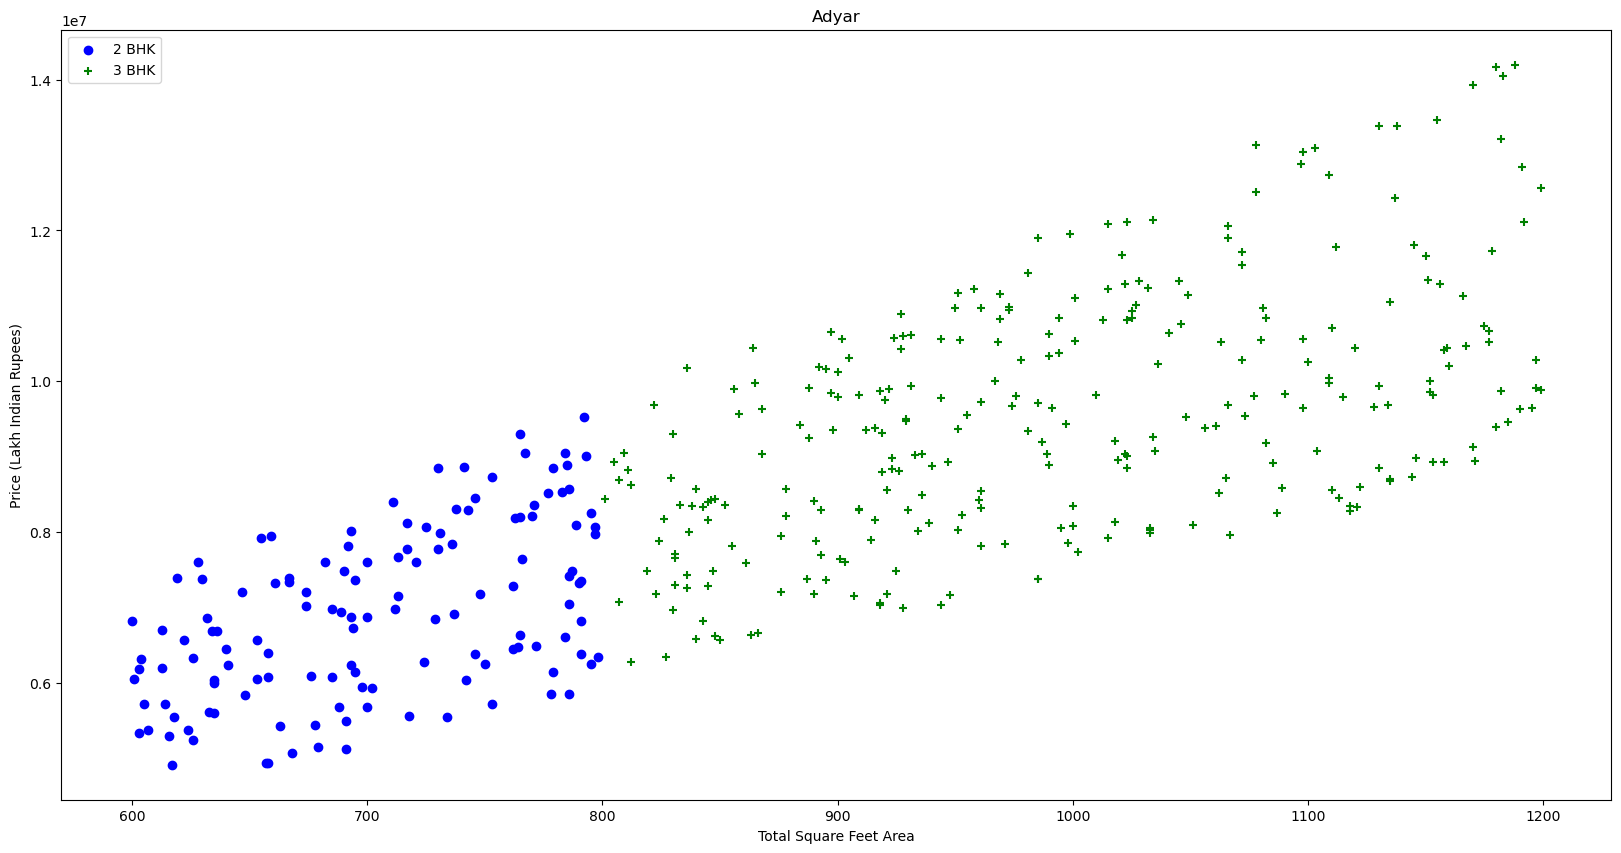

In [15]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==4)]
    bhk3 = df[(df.location==location) & (df.bhk==5)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
    
plot_scatter_chart(df7,"Adyar")

In [16]:
df7.shape

(4558, 5)

In [17]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.head()

,price_per_sqft,location,bhk,price,total_sqft
1,1.184367e+09,Adyar,5,13383350,1130
2,1.212094e+09,Adyar,4,8848285,730
3,1.041711e+09,Adyar,5,9042050,868
4,7.757730e+08,Adyar,4,5570050,718
5,1.143308e+09,Adyar,5,11673175,1021


In [18]:
for co in df8:
    print(f'{co} : {df8[co].dtype}')

price_per_sqft : float64
location : object
bhk : int32
price : int64
total_sqft : int64


In [19]:
d = pd.get_dummies(df8['location']).astype(int)
df9 = pd.concat([df8,d],axis='columns')
df9 = df9.drop(['price_per_sqft','location'],axis=1)
df9.head()

,bhk,price,total_sqft,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
1,5,13383350,1130,1,0,0,0,0,0,0
2,4,8848285,730,1,0,0,0,0,0,0
3,5,9042050,868,1,0,0,0,0,0,0
4,4,5570050,718,1,0,0,0,0,0,0
5,5,11673175,1021,1,0,0,0,0,0,0


In [20]:
X = df9.drop(['price'],axis='columns')
y = df9.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
l = LinearRegression()
l.fit(X_train,y_train)
l.score(X_test,y_test)

0.7562424861649576

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.344e+15, tolerance: 2.713e+12
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.217e+15, tolerance: 2.648e+12
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.241e+15, tolerance: 2.686e+12
  model = cd_fast.enet_coo

,model,best_score,best_params
0,linear_regression,0.756106,{'fit_intercept': True}
1,lasso,0.756107,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.591831,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [24]:
def predict_price(location,bhk,sqft):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return l.predict([x])[0]

In [25]:
predict_price('Adyar',4, 730)

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8087842.453537481

In [26]:
import pickle
with open('chennai_home_prices_model.pickle','wb') as f:
    pickle.dump(l,f)

In [27]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))